#### Importing Libraries

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Importing Datasets


The shape of X should be (n, m),
And that of Y should be (10, m)

Here,
- n = total number of features
- m = total number of observations in our dataset
- 10 = number of output classes

In [152]:
X_train = np.loadtxt('train_X.csv', delimiter = ',')
Y_train = np.loadtxt('train_label.csv', delimiter = ',')

X_train = X_train.T
Y_train = Y_train.T


In [131]:
X_test = np.loadtxt('test_X.csv', delimiter = ',')
Y_test = np.loadtxt('test_label.csv', delimiter = ',')

X_test = X_test.T
Y_test = Y_test.T

In [132]:
print("shape of X_train : ", X_train.shape)
print("shape of Y_train : ", Y_train.shape)

print("shape of X_test : ", X_test.shape)
print("shape of Y_test : ", Y_test.shape)

shape of X_train :  (784, 1000)
shape of Y_train :  (10, 1000)
shape of X_test :  (784, 350)
shape of Y_test :  (10, 350)


### Visualizing our Dataset

Our dataset is in the form of numbers. So, to visualize it properly, we will display it in the form of image

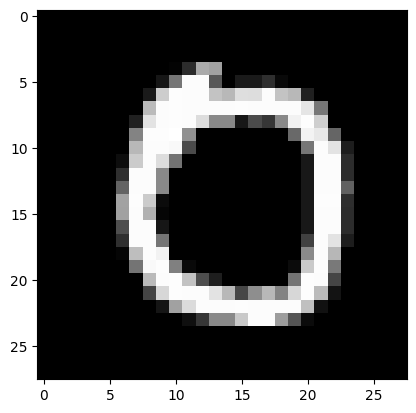

In [133]:
index = int(random.randrange(0,X_train.shape[1])) # generate a random index
plt.imshow(X_train[:, index].reshape((28,28)),cmap='gray')
plt.show()

# Model

![nn](https://github.com/utsavshahm/Neural-Network---MultiClass-Classifcation-with-Softmax/blob/main/Images/nn.png?raw=1)

## Initialize parameters Randomly
$ W_1 = np.random.randn(n_1, n_0) $

$ b_1 = np.zeros((n_1, 1))$

$ W_2 = np.random.randn(n_2, n_1) $

$ b_2 = np.zeros((n_2, 1))$


## *Repeat Below Steps for many times : *


## Forward Propagation

$ Z_1 = W_1 * X + B_1 $

$ A_1 = f ( Z_1 ) $  

$ Z_2 = W2 * A_1 + B_2 $

$ A_2 = Softmax( Z_2 ) $

## Softmax

$ a_i = \frac{e^{z_i}}{\sum_{i=k}^ne^{z_k}}$


## Cost Function

$Loss = - \sum_{i=k}^{n}[ y_k*log(a_k) ]$

$Cost = - \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{n}[ y_k*log(a_k) ]$



## Backward Propagation
$dZ_2 = ( A_2 - Y )$

$ dW_2 = \frac{1}{m}. dZ_2 . A_1^T$

$ dB_2 = \frac{1}{m}.sum(dZ_2, 1)$



$dZ_1 = W_2^T . dZ_2 * f_1^|(Z_1) $

$dW_1 = \frac{1}{m}.dZ_1.X^T$

$dB_1 = \frac{1}{m}.sum(dZ_1, 1)$


## Updating Parameters

$ W_2 = W_2 -  \alpha * \frac{\partial Cost }{\partial W_2}$

$ B_2 = B_2 -  \alpha * \frac{\partial Cost }{\partial B_2}$

$ W_1 = W_1 -  \alpha * \frac{\partial Cost }{\partial W_1}$

$ B_1 = B_1 -  \alpha * \frac{\partial Cost }{\partial B_1}$


# Activation Functions

In [134]:
def tanh(x):

    return np.tanh(x)

In [135]:
def relu(x):
    return np.maximum(x, 0)


In [149]:
def softmax(x):

    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)

The function *derivative_tanh* must return the derivative of tanh.
The function *derivative_relu* must return the derivative of ReLU

In [137]:
def derivative_tanh(x):

    return 1 - np.power(np.tanh(x), 2)

def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)

# Initialize Parameters

We need to initialize the **W** parameters randomly, and **B** with zeros

- np.random.randn(a, b) return a numpy array of shape(a, b) with small random values
- For making the values small, we multiply 0.01
- np.zeros((a, b) return a numpy array of shape(a, b) with zeros

### Why need small weights W?
If we initialize weights will large values, then Z = W * X + B, will be large. For functions like tanh and sigmoid, the slope becomes very less for large Z value, thus learning can be very slow.


In [151]:
def initialize_parameters(n_first, n_second, n_final):

    w1 = np.random.randn(n_second, n_first)*0.01
    b1 = np.zeros((n_second, 1))
    w2 = np.random.randn(n_final, n_second)*0.01
    b2 = np.zeros((n_final, 1))

    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }

    return parameters

# Forward Propagation

We need to impletement the following equation for forward propagation :

$ Z_1 = W_1 * X + B_1 $

$ A_1 = f ( Z_1 ) $  

$ Z_2 = W2 * A_1 + B_2 $

$ A_2 = Softmax( Z_2 ) $

For f(x), you can use either tanh or ReLU activation function.

But also use the same for Backpropagation as well

In [139]:
def forward_prop(x, parameters):

    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']


    z1 = np.dot(w1, x) + b1
    a1 = relu(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)

    # To return our Zs and As
    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }

    return forward_cache

# Cost Function

$Loss = - \sum_{k=1}^{n}[ y_k*log(a_k) ]$ .. *for 1 observation*

$Cost = - \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{n}[ y_k*log(a_k) ]$  .. *for all m observations*

You can use np.sum()
- np.sum(A, axis = 1, keepdims = True) return the column-wise sum for a matrix A
- np.sum(A, axis = 0, keepdims = True) returns the row-wise sum for a matrix A
- np.sum(A) returns the summation of all the elements of A

*keepdims = True keeps the dimenstion in place. In certain cases, the returned sum can be of shape(m,) instead of shape(m, 1).
So, keepdims = True forces it to return the sum in shape(m, 1) instead of shape(m,)*


More about np.sum() here : https://numpy.org/doc/stable/reference/generated/numpy.sum.html

In [163]:
def cost_function(a2, y):

    m = y.shape[1]
    cost = np.sum(y*np.log(a2))
    return (-1/m) * cost

# Backward Propagation

We need to implement the below equations for backward propagation.

$dZ_2 = ( A_2 - Y )$

$ dW_2 = \frac{1}{m}. dZ_2 . A_2^T$

$ dB_2 = \frac{1}{m}.sum(dZ_2, 1)$



$dZ_1 = W_2^T . dZ_2 * f_1^|(Z_1) $

$dW_1 = \frac{1}{m}.dZ_1.X^T$

$dB_1 = \frac{1}{m}.sum(dZ_1, 1)$

In [141]:
def backward_prop(x, y, parameters, forward_cache):

    m = x.shape[1]

    # Fetching our parameters
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    # Fetching our forward_cache
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']


    dz2 = a2 - y
    dw2 = 1/m * np.dot(dz2, a1.T)
    db2 = 1/m * np.sum(dz2, axis = 1, keepdims = True)

    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_relu(a1)
    dw1 = 1/m * np.dot(dz1, x.T)
    db1 = 1/m * np.sum(dz1, axis = 1, keepdims = True)


    ## Returning the Gradients
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }

    return gradients

# Update Parameters

In [142]:
def update_parameters(parameters, gradients, learning_rate):

    # Fetching our parameters
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    # Fetching our gradients
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']

# updating the weights and biases
    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2

    # Returning the updated parameters
    Parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }

    return Parameters

# Complete Model

The complete model :

### Instructions :

We need to initialize parameters once, and after that, we will run the following in a loop:
- forward_prop(x, parameters)
- cost_function(a2, y)
- backward_prop(x, y, parameters, forward_cache)
- parameters = update_parameters(parameters, gradients, learning_rate)

### Return :
- parameters, which will be our trained parameters
- cost_list, which contains cost for every iterations.

In [143]:
def model(x, y, n_h, learning_rate, iterations):

    n_x = x.shape[0]                       # must return the number of neurons/features in input layer
    n_y = y.shape[0]                       # must return the number of neurons in output layer


    cost_list = []

    parameters = initialize_parameters(n_x, n_h, n_y)


    for i in range(iterations):

        # Forward Propagation
        forward_cache = forward_prop(x, parameters)
        a2 = forward_cache['a2']
        # Cost Function
        cost = cost_function(a2, y)

        # Backward Propagation
        gradients = backward_prop(x, y, parameters, forward_cache)

        # Update Parameters
        parameters = update_parameters(parameters, gradients, learning_rate)

        cost_list.append(cost)

        if i%(iterations/10) == 0 :
            print("cost after", i, "iters is" ,     cost   )


    return parameters, cost_list

In [165]:


n_h = 1000
learning_rate = 0.002
iterations = 100

Parameters, Cost_list = model(X_train, Y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

cost after 0 iters is 7.5214643007205195
cost after 10 iters is 27.389814563393156
cost after 20 iters is 7.753710493873135
cost after 30 iters is 0.7626970495986272
cost after 40 iters is 1.2301604522842953
cost after 50 iters is 0.3664683491101093
cost after 60 iters is 0.1744635604564111
cost after 70 iters is 0.10098966122200508
cost after 80 iters is 0.06092973457146661
cost after 90 iters is 0.03671265032538972


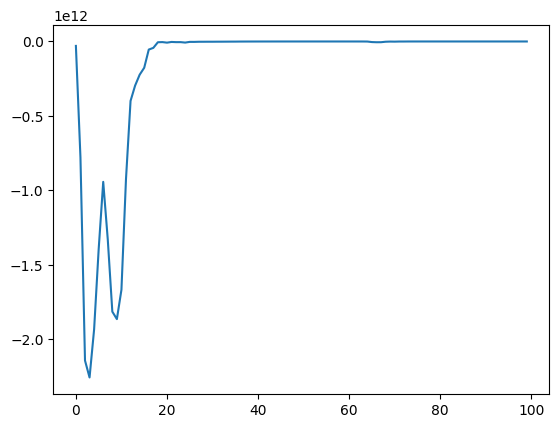

In [158]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

# Checking Accuracy

Run the below cells to check your model Accuracy

In [168]:
def accuracy(inp, labels, parameters):
    forward_cache = forward_prop(inp, parameters)
    a_out = forward_cache['a2']   # containes propabilities with shape(10, 1)

    a_out = np.argmax(a_out, 0)  # 0 represents row wise

    labels = np.argmax(labels, 0)

    acc = np.mean(a_out == labels)*100

    return acc

In [169]:
print("Accuracy of Train Dataset", accuracy(X_train, Y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test, Y_test, Parameters), 2), "%")

Accuracy of Train Dataset 99.5 %
Accuracy of Test Dataset 86.0 %


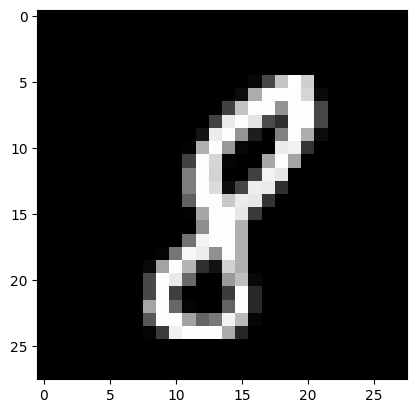

Our model says it is : 8


In [170]:
idx = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28,28)),cmap='gray')
plt.show()

cache = forward_prop(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])